In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the data
df = pd.read_csv('bank.csv')

In [4]:
# Check the data
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [5]:
# Check the shape of the dataset
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 4521, Columns: 17


In [6]:
# Understanding the data types in the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [7]:
# Understand the numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
# Find the unique values in the categorical columns
for column in df.select_dtypes(include='object').columns:
    print(column)
    print(df[column].unique())

job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


### Exploratory Data Analysis
* Find Unwanted Columns
* Find Missing Values
* Find Features with one value
* Explore the Categorical Features
* Find Categorical Feature Distribution
* Relationship between Categorical Features and Label
* Explore the Numerical Features
* Find Discrete Numerical Features
* Relation between Discrete numerical Features and Labels
* Find Continous Numerical Features
* Distribution of Continous Numerical Features
* Relation between Continous numerical Features and Labels
* Find Outliers in numerical features
* Explore the Correlation between numerical features
* Find Pair Plot
* Check the Data set is balanced or not based on target values in classification

#### Find Unwanted Columns
Since there are no fields like IDs, we do not see any fields that can be removed from the dataset.

#### Find missing values


In [9]:
for column in df.columns:
    print(f'{column} : {df[column].isnull().sum()}')
    

age : 0
job : 0
marital : 0
education : 0
default : 0
balance : 0
housing : 0
loan : 0
contact : 0
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 0
y : 0


#### Finding features with one value
Conclusion: Since there are no columns with unique value = 1, we conclude that there are no columns with unique values. And hence, no columns to remove from the dataset.

In [10]:
for column in df.columns:
    print(f'{column} : {df[column].nunique()}')

age : 67
job : 12
marital : 3
education : 4
default : 2
balance : 2353
housing : 2
loan : 2
contact : 3
day : 31
month : 12
duration : 875
campaign : 32
pdays : 292
previous : 24
poutcome : 4
y : 2


In [11]:
# Explore the categorical variables
categorical_vars = []
for column in df.select_dtypes(include='object').columns:
    categorical_vars.append(column)

# Remove y from the list, since it is the outcome variable
categorical_vars.remove('y')
print(categorical_vars)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


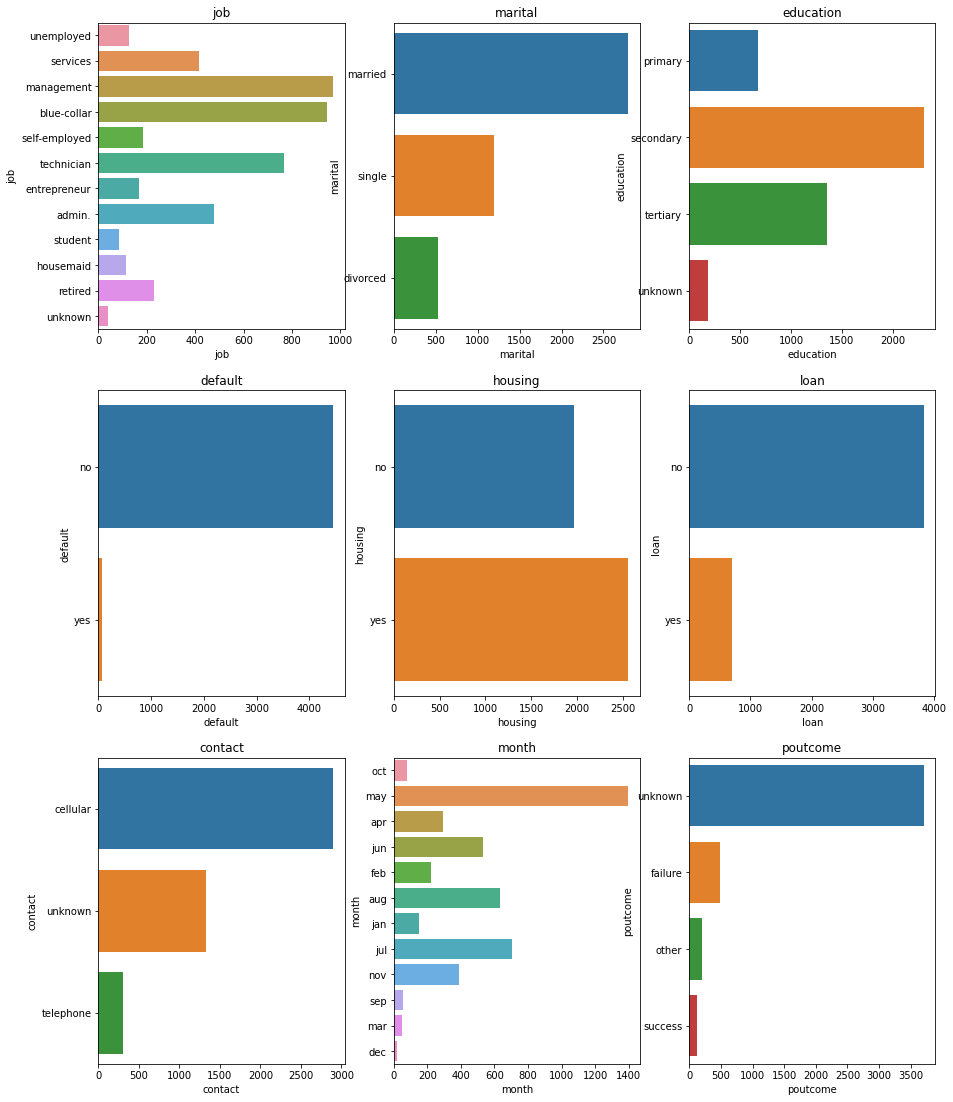

In [12]:
# Find Categorical Feature Distribution
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for feature in categorical_vars:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=feature,data=df)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
plt.savefig('categorical_variable_counts')
plt.show()

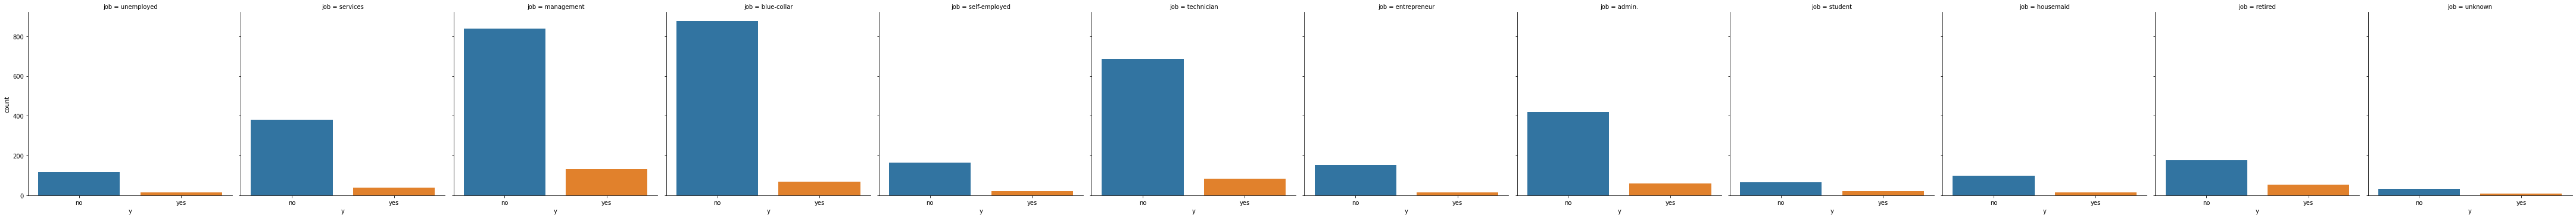

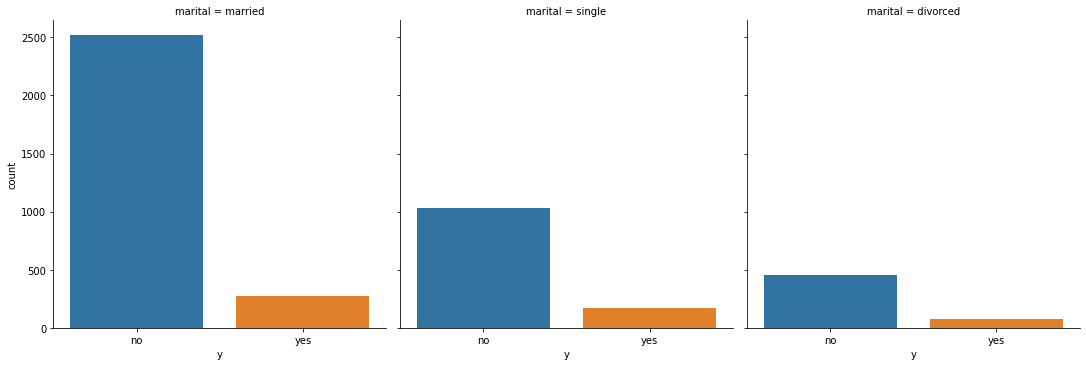

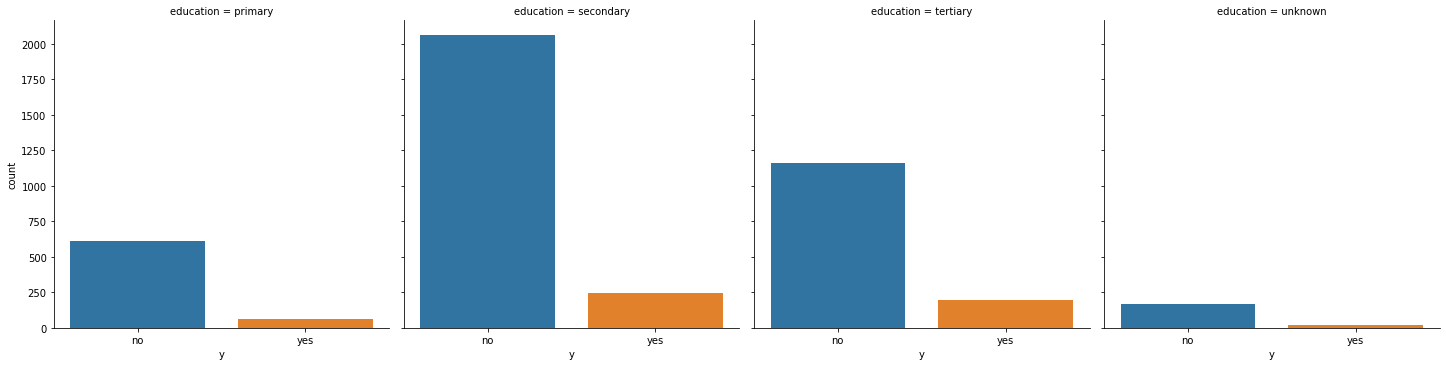

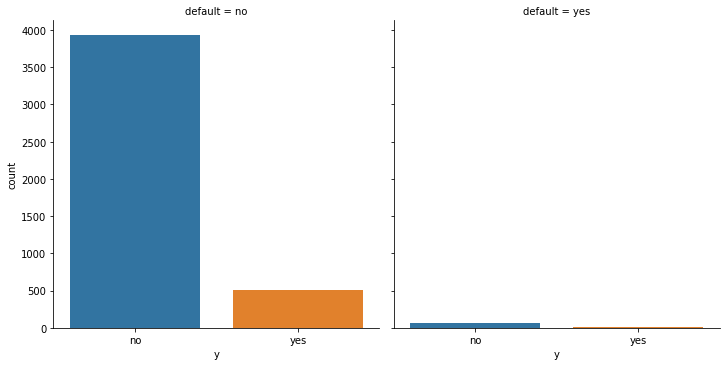

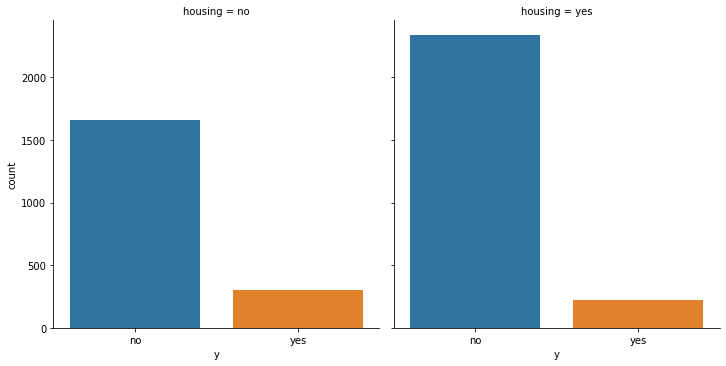

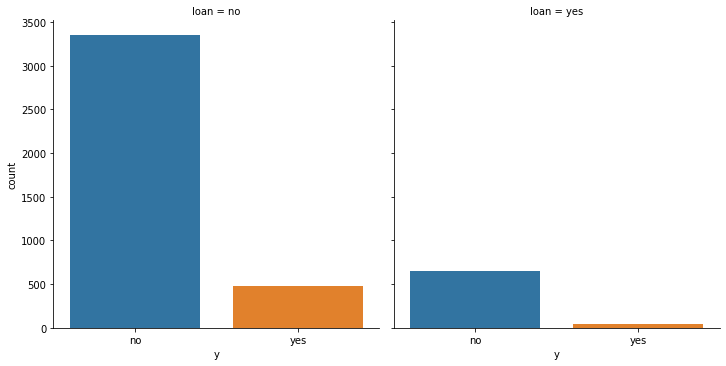

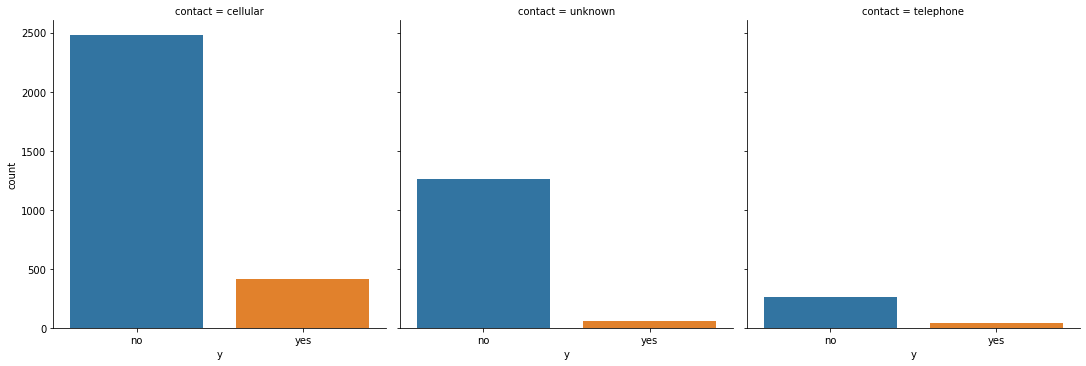

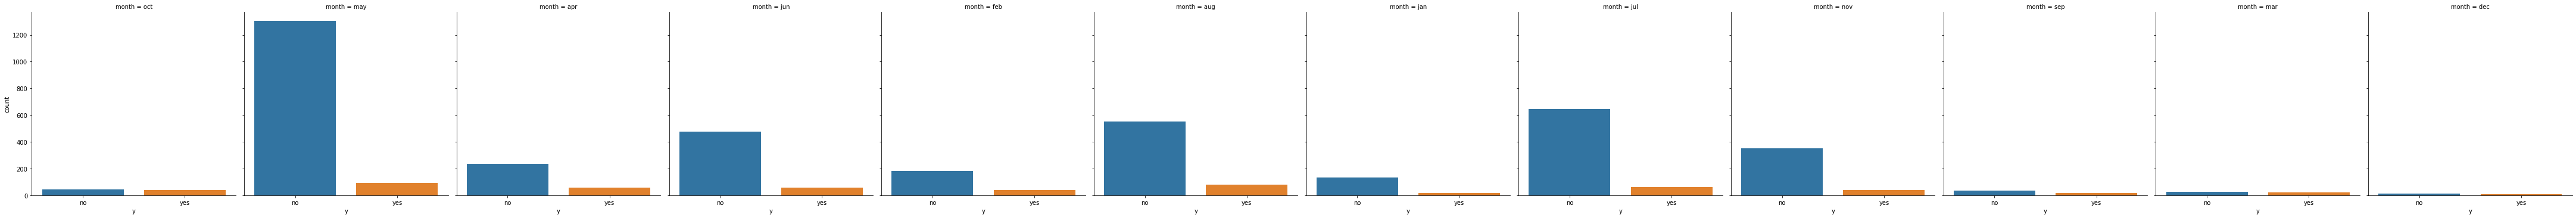

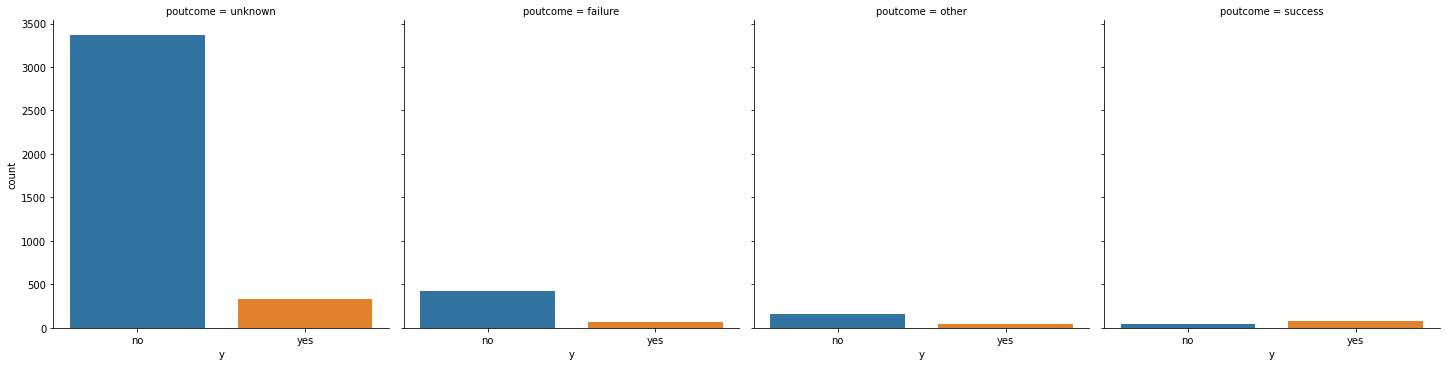

In [13]:
# Relationship between Categorical Features and Label
for feature in categorical_vars:
    sns.catplot(x='y', col=feature, kind='count', data=df)
plt.show()


In [14]:
# Check target label split over categorical features and find the count
for feature in categorical_vars:
    print(df.groupby(['y', feature]).size())

y    job          
no   admin.           420
     blue-collar      877
     entrepreneur     153
     housemaid         98
     management       838
     retired          176
     self-employed    163
     services         379
     student           65
     technician       685
     unemployed       115
     unknown           31
yes  admin.            58
     blue-collar       69
     entrepreneur      15
     housemaid         14
     management       131
     retired           54
     self-employed     20
     services          38
     student           19
     technician        83
     unemployed        13
     unknown            7
dtype: int64
y    marital 
no   divorced     451
     married     2520
     single      1029
yes  divorced      77
     married      277
     single       167
dtype: int64
y    education
no   primary       614
     secondary    2061
     tertiary     1157
     unknown       168
yes  primary        64
     secondary     245
     tertiary      193
     unkn

In [15]:
# Explore the Numerical Features
numerical_vars = []
for column in df.select_dtypes(include='int64').columns:
    numerical_vars.append(column)

df[numerical_vars].head()


,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

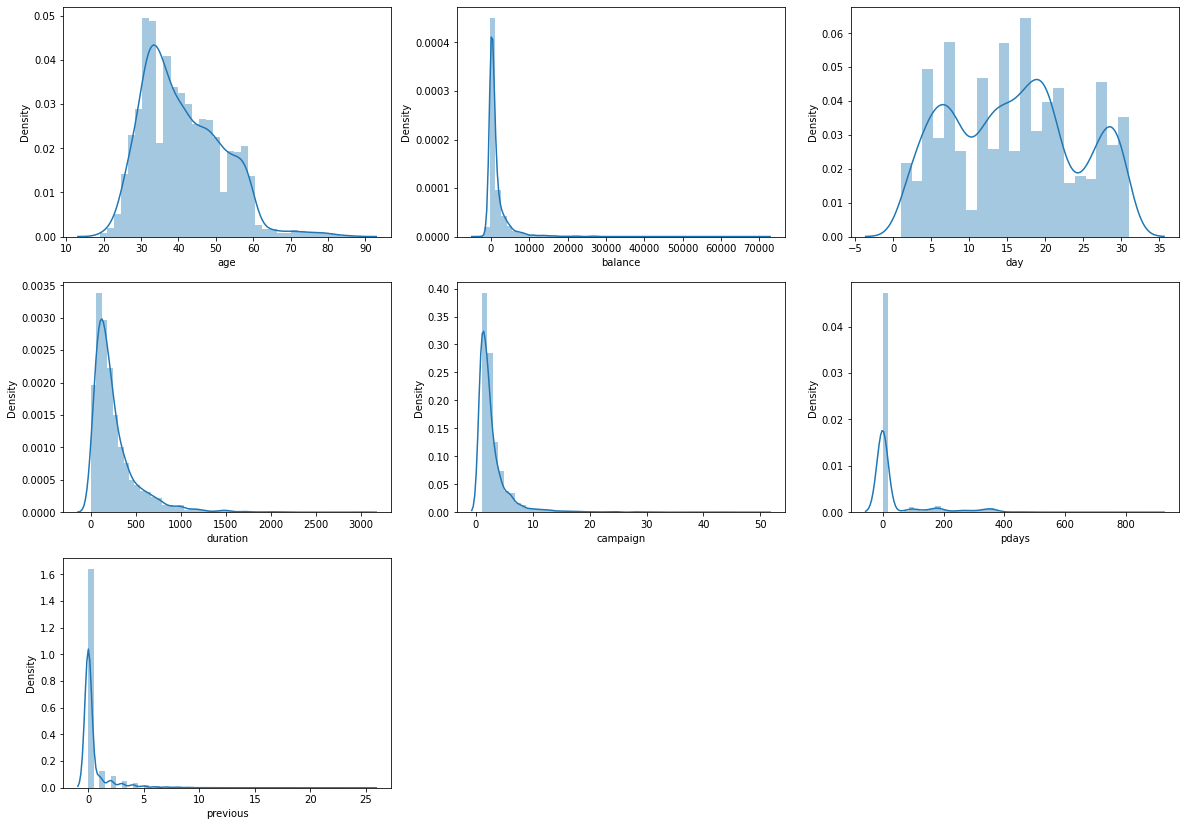

In [16]:
# Distribution of Continous Numerical Features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in numerical_vars:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.show()


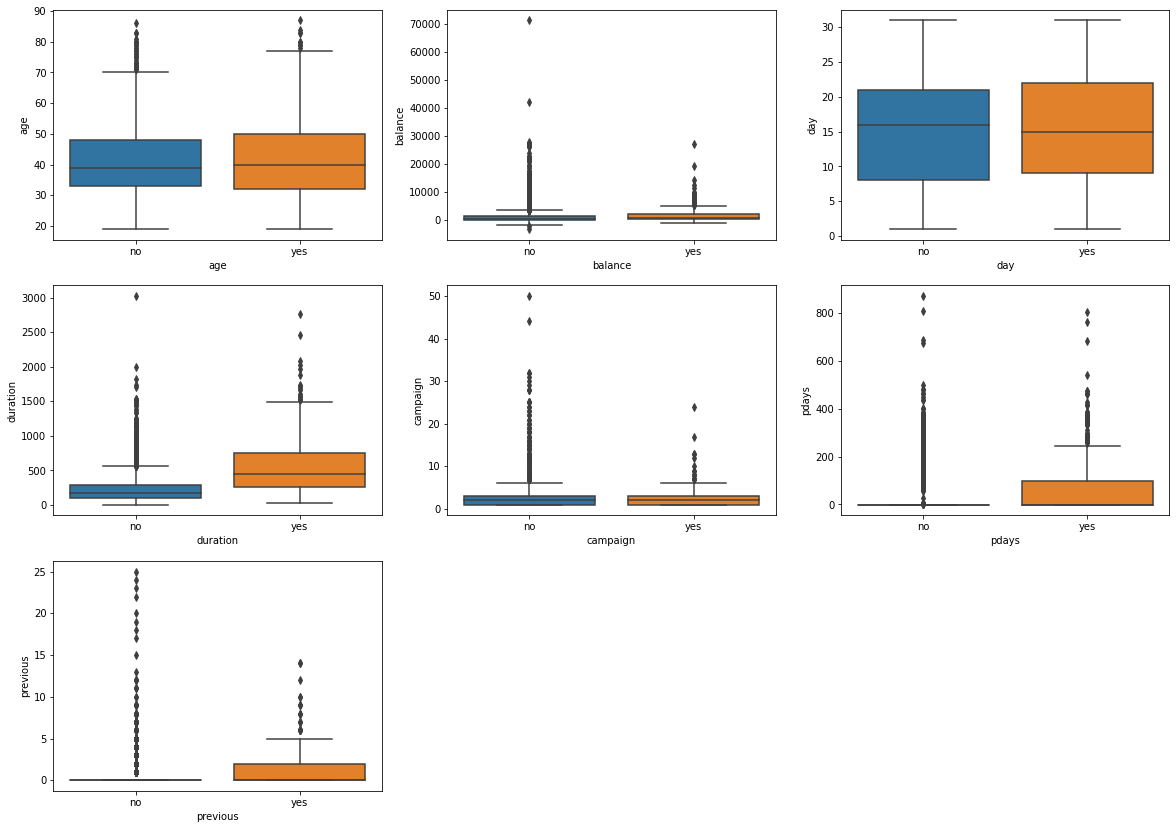

In [17]:
# Relation between Continous numerical Features and Labels
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in numerical_vars:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seab

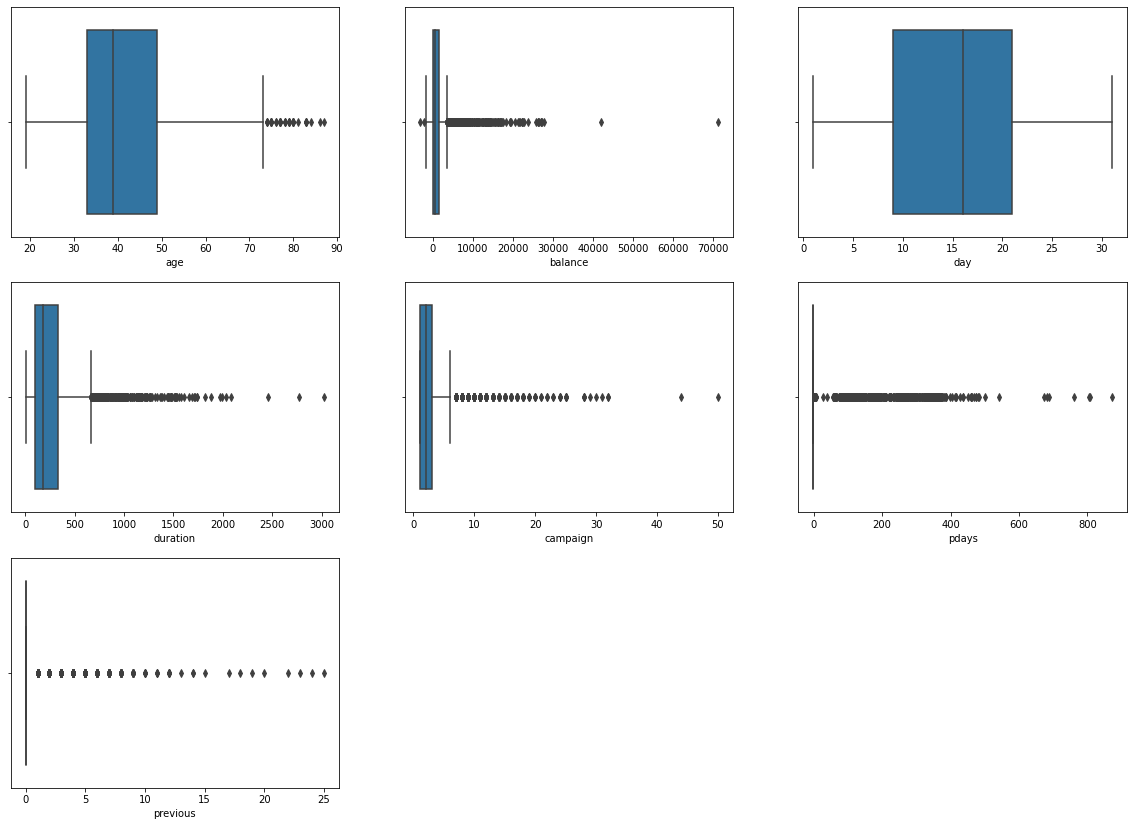

In [18]:
# Find Outliers in numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in numerical_vars:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

<AxesSubplot:>

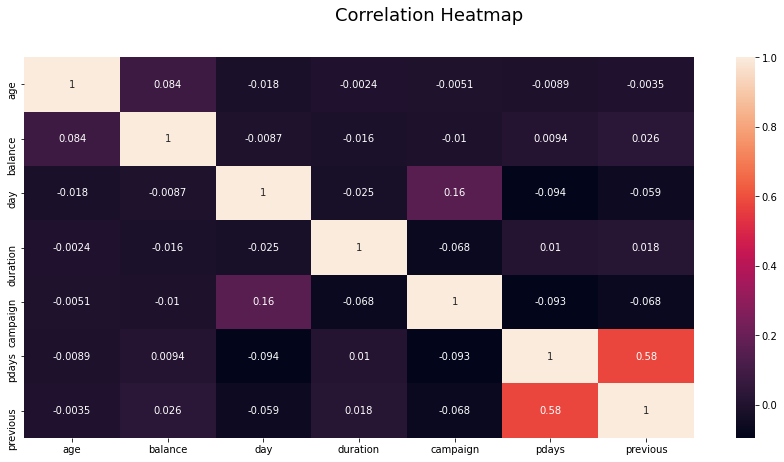

In [19]:
# Explore the Correlation between numerical features
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
fig.suptitle('Correlation Heatmap', fontsize=18)
sns.heatmap(cor_mat,annot=True)

In [20]:
# Check the Data set is balanced or not based on target values in classification
df['y'].groupby(df['y']).count()


y
no     4000
yes     521
Name: y, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


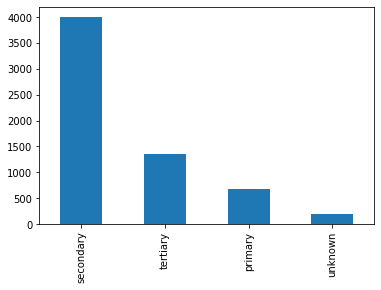

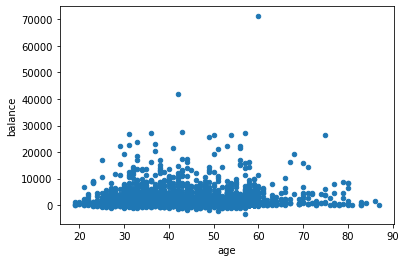

In [21]:
# Data visualization
y_plot = df["y"].value_counts().plot(kind='bar')
print(y_plot)
edu_plot = df["education"].value_counts().plot(kind='bar')
print(edu_plot)
scatter = df.plot(kind='scatter',x='age',y='balance')
print(scatter)

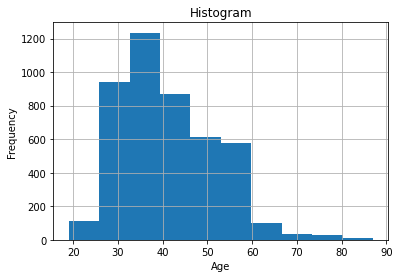

In [22]:
# Understanding the age distribution
df.age.hist()
plt.title('Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution')

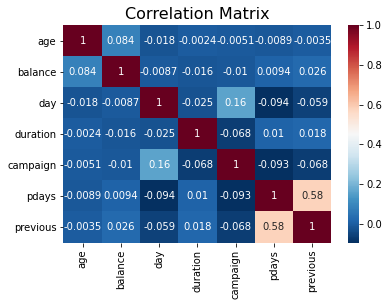

In [23]:
# Checking feature Correlations

cor = df.corr()
num_df = df.select_dtypes(exclude="object")
corr_num = num_df.corr()
sns.heatmap(corr_num, annot=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [24]:
# Encoding Target variable
target = {"y":     {"yes": 1, "no": 0}}
df1 = df.replace(target)
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


### Encode character variables

In [25]:
df2 = pd.get_dummies(df1, columns = categorical_vars)
df2.describe

<bound method NDFrame.describe of       age  balance  day  duration  campaign  pdays  previous  y  job_admin.  \
0      30     1787   19        79         1     -1         0  0           0   
1      33     4789   11       220         1    339         4  0           0   
2      35     1350   16       185         1    330         1  0           0   
3      30     1476    3       199         4     -1         0  0           0   
4      59        0    5       226         1     -1         0  0           0   
...   ...      ...  ...       ...       ...    ...       ... ..         ...   
4516   33     -333   30       329         5     -1         0  0           0   
4517   57    -3313    9       153         1     -1         0  0           0   
4518   57      295   19       151        11     -1         0  0           0   
4519   28     1137    6       129         4    211         3  0           0   
4520   44     1136    3       345         2    249         7  0           0   

      job_blue-co

### Splitting the datasets into training and testing

In [26]:
# Create training and testing datasets
from sklearn.model_selection import train_test_split
X = df2.drop(['y'], axis=1)
y = df2['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3164, 51) (3164,)
(1357, 51) (1357,)


### Implementing the Logistic Regression Classifier

In [27]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# Prediction
lg_pred = lg_model.predict(X_test)

# model Evaluation
print('Accuracy of logistic regression: {:.2f}'.format(lg_model.score(X_test, y_test)))


# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, lg_pred)
print(f'Confusion Matrix: {confusion_matrix}')

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, lg_pred))

Accuracy of logistic regression: 0.88
Confusion Matrix: [[1157   33]
 [ 133   34]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1190
           1       0.51      0.20      0.29       167

    accuracy                           0.88      1357
   macro avg       0.70      0.59      0.61      1357
weighted avg       0.85      0.88      0.85      1357



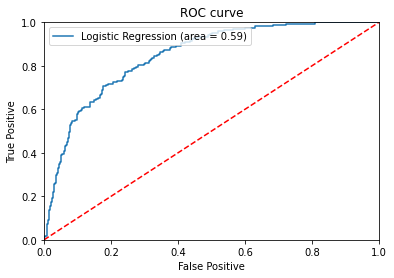

In [29]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lg_roc_auc = roc_auc_score(y_test, lg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve')
plt.legend(loc="upper left")
plt.savefig('Lg_model_ROC curve')
plt.show()

In [33]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lg_pred)

# Extract the values from the confusion matrix
tn = cm[0][0]
tp = cm[1][1]
fn = cm[1][0]
fp = cm[0][1]

print(f'TN: {tn} TP: {tp} FN: {fn} FP: {fp}')

TN: 1157 TP: 34 FN: 133 FP: 33


In [37]:
# Calculate the accuracy, precision, specificity and sensitivity
accuracy = (float (tp+tn) / float(tp + tn + fp + fn))
precision = (tn / float(tn + fp))
specificity = (tn / float(tn + fp))
sensitivity = (tp / float(tp + fn))

print(f'Accuracy: {round(accuracy,4)}')
print(f'Precision: {round(precision,4)}')
print(f'Specificity: {round(specificity,4)}')
print(f'Sensitivity: {round(sensitivity,4)}')

Accuracy: 0.8777
Precision: 0.9723
Specificity: 0.9723
Sensitivity: 0.2036
